# Question

Source: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-anova/bs704_hypothesistesting-anova_print.html#:~:text=The%20null%20hypothesis%20in%20ANOVA,rather%20than%20in%20mathematical%20symbols.

A clinical trial is run to compare weight loss programs and participants are randomly assigned to one of the comparison programs and are counseled on the details of the assigned program. Participants follow the assigned program for 8 weeks. The outcome of interest is weight loss, defined as the difference in weight measured at the start of the study (baseline) and weight measured at the end of the study (8 weeks), measured in pounds.  

Three popular weight loss programs are considered. The first is a low calorie diet. The second is a low fat diet and the third is a low carbohydrate diet. For comparison purposes, a fourth group is considered as a control group. Participants in the fourth group are told that they are participating in a study of healthy behaviors with weight loss only one component of interest. The control group is included here to assess the placebo effect (i.e., weight loss due to simply participating in the study). A total of twenty patients agree to participate in the study and are randomly assigned to one of the four diet groups. Weights are measured at baseline and patients are counseled on the proper implementation of the assigned diet (with the exception of the control group). After 8 weeks, each patient's weight is again measured and the difference in weights is computed by subtracting the 8 week weight from the baseline weight. Positive differences indicate weight losses and negative differences indicate weight gains. For interpretation purposes, we refer to the differences in weights as weight losses and the observed weight losses are shown below.

Low Calorie 8,9,6,7,3

Low Fat 2,4,3,5,1

Low Carbohydrate 3,5,4,2,3

Control 2,2,-1,0,3

Is there a statistically significant difference in the mean weight loss among the four diets?  We will run the ANOVA using the five-step approach.

# Solution

## Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weight_loss = {}
weight_loss['Low Calorie'] = [8,9,6,7,3]
weight_loss['Low Fat'] = [2,4,3,5,1]
weight_loss['Low Carbohydrate'] = [3,5,4,2,3]
weight_loss['Control'] = [2,2,-1,0,3]

In [3]:
df = pd.DataFrame.from_dict(weight_loss)
df

,Low Calorie,Low Fat,Low Carbohydrate,Control
0,8,2,3,2
1,9,4,5,2
2,6,3,4,-1
3,7,5,2,0
4,3,1,3,3


In [4]:
averages = df.mean()
averages

Low Calorie         6.6
Low Fat             3.0
Low Carbohydrate    3.4
Control             1.2
dtype: float64

I can do bootstraping with resampling and see how distributions will work out.

In [5]:
np.random.choice(weight_loss['Low Fat'], size=(5,), replace=True) 

array([3, 4, 2, 3, 2])

## Bootstraping

In [6]:
steps=10000
means = {}


for program in weight_loss:
    means[program] = []
    
    for i in range(steps):
        means[program].append(np.mean( np.random.choice(weight_loss[program], size=(5,), replace=True) ))

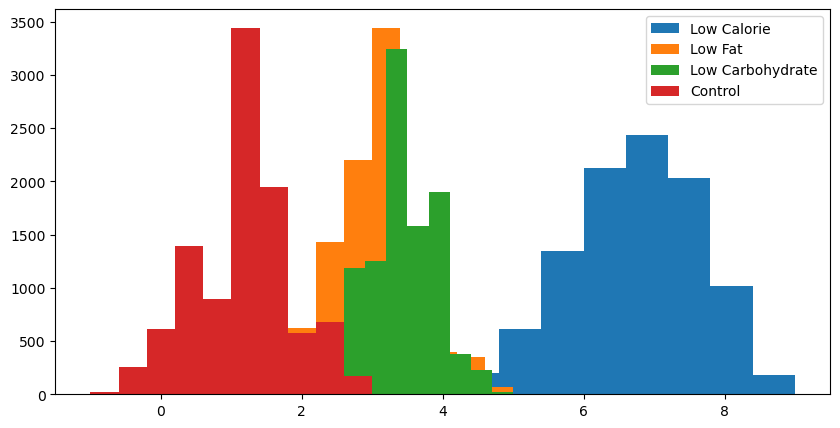

In [7]:
plt.figure(figsize=[10,5])
for program in means:
    plt.hist(means[program], bins=10, label=program)
plt.legend()

There is a difference between groups: low calorie, control, and either low fat or low carbohydrate.

Low fat and low carbohydrate looks indistinguishable.

I would like to have the same conclusion by calculating confidence interval with students' distibution

## Student's distribution

In [8]:
import scipy.stats as st

In [9]:
# create 90% confidence interval
for program in means:
    print(program + " name:")
    print(st.t.interval(alpha=0.90, df=len(means[program])-1,
                  loc=np.mean(means[program]),
                  scale=st.sem(means[program])))

Low Calorie name:
(6.598000649190667, 6.628319350809334)
Low Fat name:
(2.9879114238479962, 3.008728576152004)
Low Carbohydrate name:
(3.3893241604321576, 3.4043558395678426)
Control name:
(1.186901590866242, 1.2085784091337581)


By calculating confidence intervals using Student's t-distribution I am able to say Low Calorie, Control and either Low Fat or Low Carbohydrate groups are all different groups. However I am not confident to say that Low Fat and Low Carbohydrate produce different results.

## t-test

So here we can not reject the null hypothesis.

In [10]:
st.ttest_ind(weight_loss['Low Fat'], weight_loss['Low Carbohydrate'])

Ttest_indResult(statistic=-0.4588314677411234, pvalue=0.6585638765676658)

Others:

In [11]:
st.ttest_ind(weight_loss['Low Fat'], weight_loss['Control'])

Ttest_indResult(statistic=1.7650452162436563, pvalue=0.11555535736696204)

In [12]:
st.ttest_ind(weight_loss['Control'], weight_loss['Control'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [13]:
st.ttest_ind(weight_loss['Low Calorie'], weight_loss['Control'])

Ttest_indResult(statistic=4.269074841227312, pvalue=0.002727598088070661)